In [1]:
%matplotlib inline
%load_ext watermark
%watermark -v -m -p numpy,sklearn,tensorflow

CPython 3.5.3
IPython 6.1.0

numpy 1.13.0
sklearn 0.18.1
tensorflow 1.1.0

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 4.8.0-54-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
sound_names = ["air conditioner","car horn","children playing","dog bark","drilling","engine idling",
               "gun shot","jackhammer","siren","street music"]
sound_data = np.load('urban_sound_train.npz')
X_data = sound_data['X']
y_data = sound_data['y']
X_data.shape, y_data.shape

((6985, 193), (6985, 10))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2)
len(X_train), len(X_val), len(y_train), len(y_val)

(5588, 1397, 5588, 1397)

In [5]:
X_train.shape, y_train.shape

((5588, 193), (5588, 10))

In [6]:
training_epochs = 10000
n_dim = 193
n_classes = 10
n_hidden_units_one = 1000
n_hidden_units_two = 800
n_hidden_units_three = 500
learning_rate = 0.0001

In [7]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,n_classes])

h_1 = tf.layers.dense(inputs=X, units=n_hidden_units_one, activation=tf.nn.sigmoid,
                     kernel_initializer=tf.contrib.layers.xavier_initializer(), name="h1")
h_2 = tf.layers.dense(inputs=h_1, units=n_hidden_units_two, activation=tf.nn.sigmoid,
                     kernel_initializer=tf.contrib.layers.xavier_initializer(), name="h2")
h_3 = tf.layers.dense(inputs=h_2, units=n_hidden_units_three, activation=tf.nn.sigmoid,
                     kernel_initializer=tf.contrib.layers.xavier_initializer(), name="h3")
y_hat = tf.layers.dense(inputs=h_3, units=n_classes,
                       kernel_initializer=tf.contrib.layers.xavier_initializer(), name="h4")

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=y_hat))

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

correct_prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [8]:
cost_history = []
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        _, cost = sess.run([optimizer, loss], feed_dict={X: X_train, Y: y_train})
        cost_history.append(cost)
    
    print('Validation accuracy: ',round(sess.run(accuracy, feed_dict={X: X_val, Y: y_val}) , 3))
    saver.save(sess, "model_adam.ckpt")

Validation accuracy:  0.926


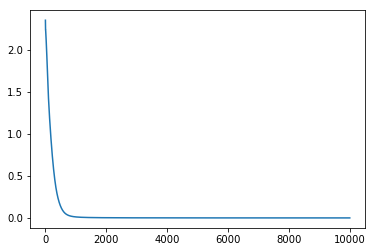

In [9]:
plt.plot(cost_history)
plt.show()